# **Identifying objects from images**
Identifying objects from images with a high variation in object position, size and
viewing angle is a particularly difficult problem, and a major application of artificial
deep learning networks. Here we will build a network to do this. This network has
more layers and is more computationally-intensive than previous exercises, even
using the low-resolution images we will use here.

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
# DATA PREPARATION
# 1) Splitting the Dataset
# 60000 images overall
# 10 classes and 5k images per class in the Training set => 50k images in the Training set, randomly ordered with numerical labels for each
# 10000 images in the Test set, ordered by their place
# 60k (Training) | 10k (Validation/Test)

# 2) Adapting the input to the ML algorithm
# NNs work with number between 0 and 1, hence dividing for the maximum value that a pixel can get will result in pixel with value between 0 (for zero-pixels) and 1 (for 255).
# Diving by the total number of pixel to work with vakues between 0 and 1. The shape of the image matrices is correct for input into Keras
x_train = x_train.reshape(50000, 32, 32, 3)
x_test = x_test.reshape(10000, 32, 32, 3)
x_train = x_train / 255 #Data Normalisation
x_test = x_test / 255
y_train = keras.utils.to_categorical(y_train, 10) #One-hot encoding for each label
y_test =  keras.utils.to_categorical(y_test, 10)

# Shape checking
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [ ]:
# DEFINING THE MODEL
# We want to use the network with the best performance from the pervoius exercise
# CNN with 2 Convolutional layers, 2 Dense layers, 2 Dropout layers, 1 Softmwax, 3 Relus

'''
Conv2D (64 filters + ReLU) | Conv2D (32 filters + ReLU) | MaxPool | Dropout | Flatten | Dense | Dropout | Dense
###
# Using the Filters to detect the features (+)
# After each layer we use the Threshold/Rectification function (ReLU) to introducce non linearity and set negative values to zero. This allow us to activate feature map that only reach the threshold
# (64) >> ReLU
# (32) >> ReLU
#  > Downsampling with MaxPooling
#   > Improving Generalisation with Dropout (0.25)
# (64) >> ReLU
# (32) >> ReLU
#  > Downsampling with MaxPooling
#   > Improving Generalisation with Dropout (0.25)
#    > Flattening to feed into the Fully-connected-NN
#     > __Dense Layer (512)
#       >> Dropout with Higher rate (0.5)
#       >> ReLU
#     > __Dense Layer (10) >> softmax to match the labels
###
'''
model = keras.Sequential()
#
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3), padding="same")) #with padding=same the output has same size as the input
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")) #using 32 filters to reduce the computational load
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))
#Repeating
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3), padding="same")) #with padding=same the output has same size as the input
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")) #using 32 filters to reduce the computational load
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))
#Fully-connected neurons layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
#Compiling
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6), metrics='accuracy' )
#Fitting
history = model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                        

Text(0.5, 1.0, 'Accuracy Curves')

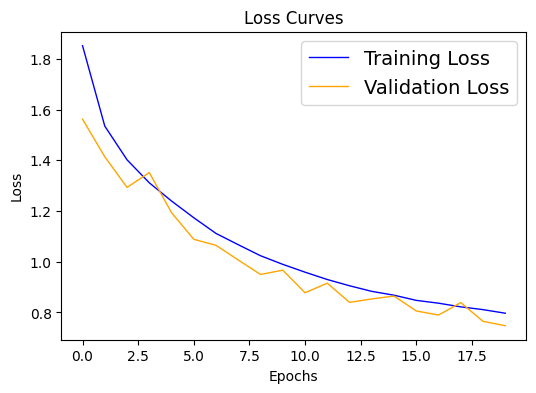

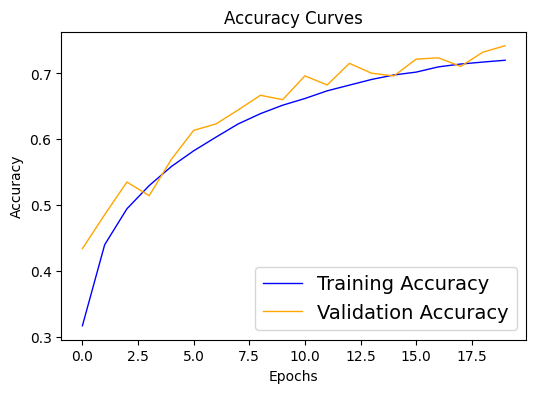

In [ ]:
# Plotting the loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'blue', linewidth=1.0)
plt.plot(history.history['val_loss'], 'orange', linewidth=1.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Plotting the accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'blue', linewidth=1.0)
plt.plot(history.history['val_accuracy'], 'orange', linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(accuracy)
print(loss)

0.7421000003814697
0.7475927472114563


Comparing the Object recognition model to the Digit recognition model:

1.   training time
2.   Influential factors
3.   training history
4.   task difference

1) The object recognition model's amount of time needed to run each epoch decreases over time, starting
close to 600 seconds the next epoch values oscillate with local maxima values in the fourth and
seventh epochs. On the other hand, the digit recognition model is less time-consuming while
decreasing with some oscillations and an average value per epoch which halves the ones of the object
recognition model. Interestingly, the two models take a different amount of time to train during the first
epoch with the object recognition model starting from its greatest amount among all the epochs and the
other model with the one of its smaller value. They adopt the same pattern while achieving a
smaller/greater value from the initial value, on the second epoch, while differing on the following times
that have a decreasing trajectory for the digit model and an unstable trend for the object model.


2) Model complexity, bigger dataset (3 channels images) and increased number of epochs. Since the
object recognition task we’re solving requires objects of different sizes and positions, the structure of
our network will be more complex compared to the digit recognition model structure. In this case, we’re
adding an extra two convolutional layers, repeating the MaxPool-dropout sequence later and then
flattening to connect to the fully-connected layers that now are almost 5 times more dense. The two
models differ in the total number of trainable parameters and also for the application of different
optimisation algorithms with different learning rates. Even though the object recognition RMSProp
optimisation algorithm is computationally efficient, it requires a fixed learning rate value while the digit
recognition optimisation algorithm Adadelta adjusts overtime its learning rate making it even more
efficient and dynamic. Another reason is the adoption of bigger and coloured (3 channels) images in
the Cifar-10 dataset, resulting in a longer training of the object recognition model. The images are run
in a different order of batches for each epoch and divided into more epochs to make the training easier.


3) If we look at the general trend, we can see from the plot that in the object recognition model the test
accuracy fluctuates slightly throughout the training intersecting with the training accuracy function.
Although the test accuracy ended up exceeding the training accuracy curve it’s clear that the model
generalised poorly (75%) while the digit recognition model performed well on unseen data (98%).
When it comes to the loss a similar but reversed situation can be observed in response to the increase
and improved learning along all the epochs. A close look at the epochs shows that the digit recognition
model reached the greatest value in accuracy both in the training set and the dataset. Both the model
training accuracies had a short spike in the first two epochs and then flattened whether the validation
accuracy converged pretty soon

